In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veronika09","key":"6a8090810ea90ada5f6d8ed92998c830"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d amirhosseinmirzaie/diamonds-price-dataset

  0% 0.00/557k [00:00<?, ?B/s]
100% 557k/557k [00:00<00:00, 127MB/s]


In [4]:
!mkdir diamonds-price-dataset
!unzip diamonds-price-dataset.zip -d diamonds-price-dataset
!ls diamonds-price-dataset

Archive:  diamonds-price-dataset.zip
  inflating: diamonds-price-dataset/diamonds.csv  
diamonds.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('/content/diamonds-price-dataset/diamonds.csv')

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


<Axes: >

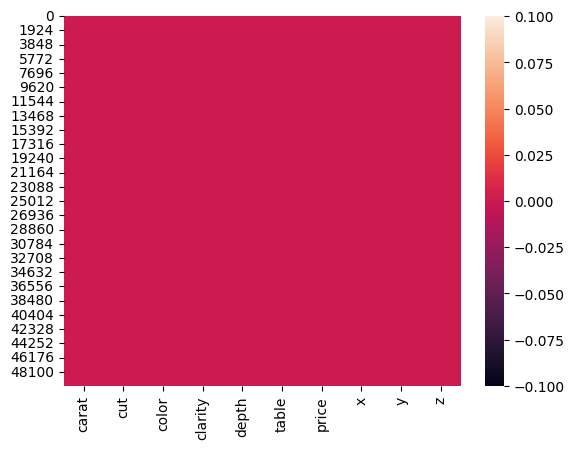

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.shape

(50000, 10)

<ipython-input-12-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

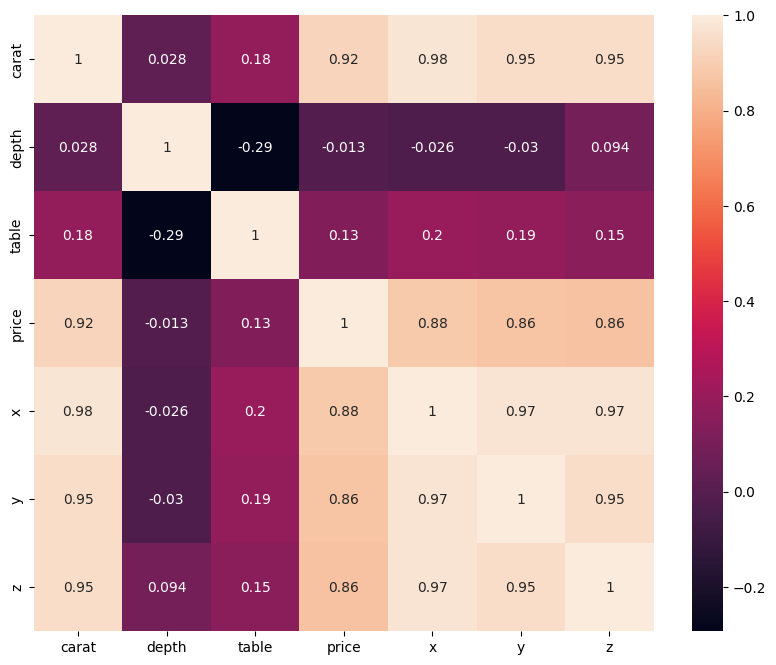

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [13]:
cut = df.groupby('cut').count()[['carat']].sort_values(by='carat', ascending=True).reset_index()
cut = cut.rename(columns={'carat':'numberOfDiamonds'})

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Fair'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Very Good'),
  Text(3, 0, 'Premium'),
  Text(4, 0, 'Ideal')])

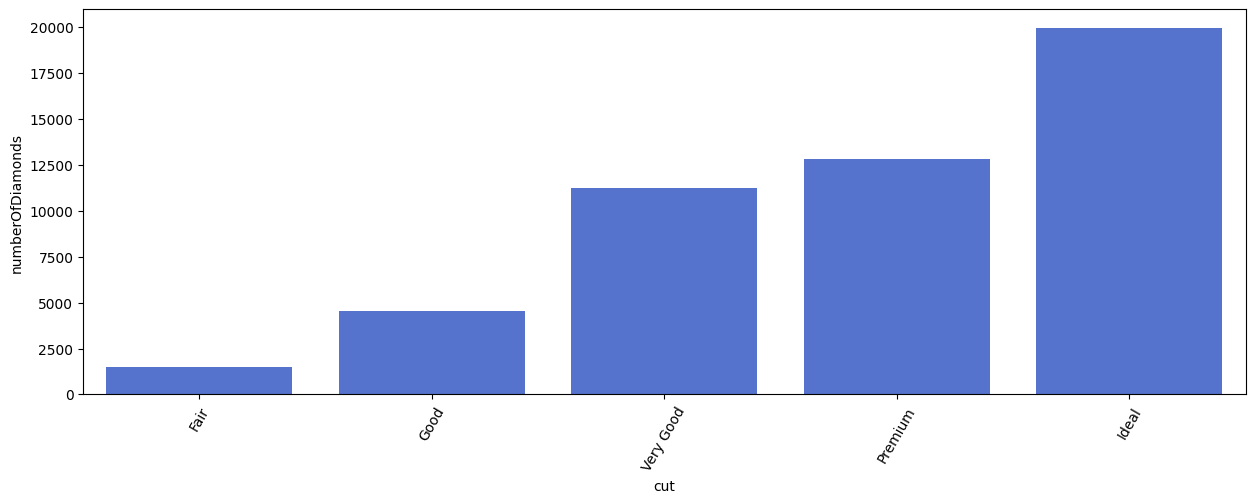

In [14]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=cut['cut'], y=cut['numberOfDiamonds'], color='royalblue')
plt.xticks(rotation=60)

In [15]:
 depth = df.groupby('depth').count()[['carat']].sort_values(by='carat').reset_index()
 depth = depth.rename(columns={'carat':'count'})

<Axes: xlabel='depth', ylabel='count'>

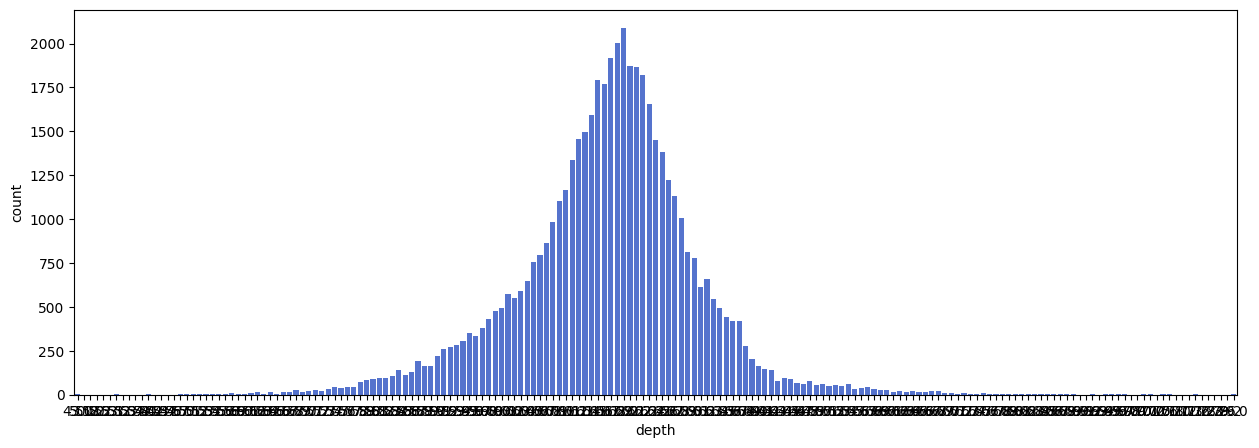

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=depth['depth'], y=depth['count'], color='royalblue')

<ipython-input-17-461d14756f38>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['table'])


<Axes: xlabel='table', ylabel='Density'>

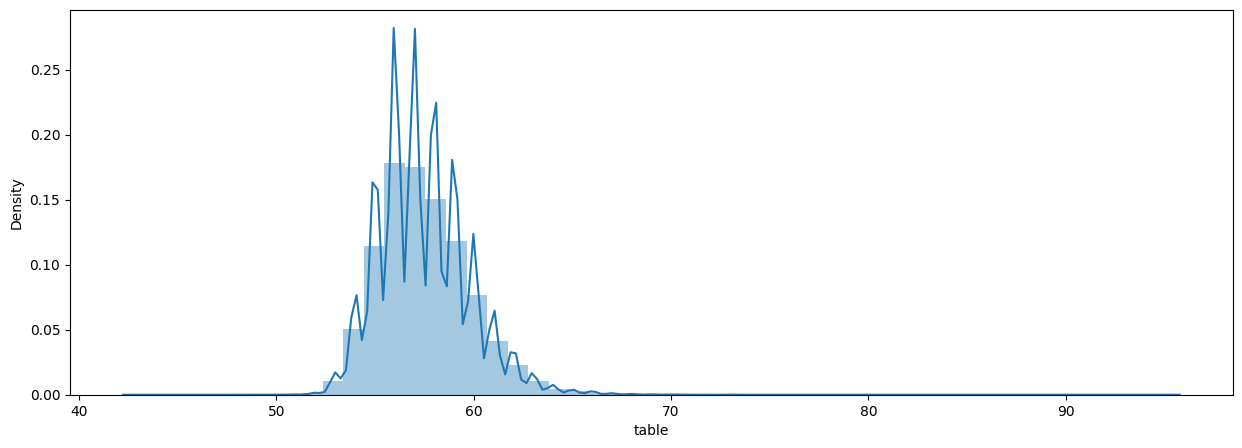

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df['table'])

<ipython-input-18-7a32f1d4aa34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

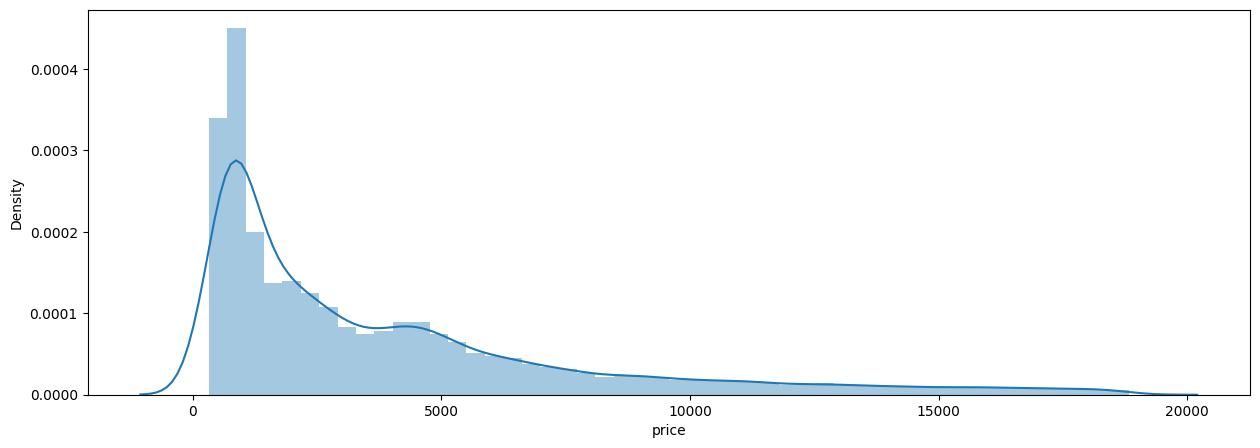

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

In [19]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
x = df[features]
y = df['price']
x.shape, y.shape

((50000, 6), (50000,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(12500,)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [23]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =', score)

akurasi model regresi linier = 0.8567815493322518


In [24]:
input_data = np.array([[0.23, 61.5, 55, 3.95, 3.98, 2.43]])

prediction = lr.predict(input_data)
print('Estimasi harga diamonds :', prediction)

Estimasi harga diamonds : [332.07169763]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.metrics import r2_score
r2_DT = r2_score(y_test, pred)
r2_DT

print(f"Precision = {r2_DT}")

Precision = 0.8567815493322518


In [26]:
import pickle

filename = 'diamonds_price.sav'
pickle.dump(lr, open(filename, 'wb'))